In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array

folder1 = '/content/drive/MyDrive/DOCUMENTS/PROJECT_AI/Gender_data/Training/female'
folder2 = '/content/drive/MyDrive/DOCUMENTS/PROJECT_AI/Gender_data/Training/male'

folders = [folder1, folder2]
photos, labels = list(), list()
for i in range(2):
  for file in listdir(folders[i]):
    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)              
    labels.append(i) 
    
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dưới dạng mảng
class_name = ['Female','Male']           

print(photos.shape, labels.shape, class_name)
save('/content/drive/MyDrive/DOCUMENTS/PROJECT_AI/FILE_NPY/GENDER/photos.npy', photos)
save('/content/drive/MyDrive/DOCUMENTS/PROJECT_AI/FILE_NPY/GENDER/labels.npy', labels)

In [ ]:
#import thu vien
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils

In [ ]:
#load file npy
photos = np.load('/content/drive/MyDrive/PROJECT_AI/FILE_NPY/GENDER/photos.npy')
labels = np.load('/content/drive/MyDrive/PROJECT_AI/FILE_NPY/GENDER/labels.npy')
class_name = ['female','male']

In [ ]:
print(photos.shape, labels.shape, class_name)

(10450, 100, 100, 3) (10450,) ['female', 'male']


In [ ]:
#tạo dữ liệu train 75% và test 25%
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=42)   
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(7837, 100, 100, 3) (2613, 100, 100, 3)
(7837,) (2613,)


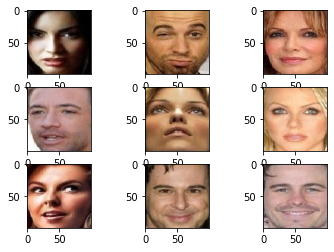

In [ ]:
#show 9 ảnh đầu tiên trong tập dữ liệu train       
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
#Xử lý dữ liệu
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

In [ ]:
#train model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128,epochs=500,verbose=1,validation_data = (x_test, y_test))
#save model
model.save('/content/drive/MyDrive/gender_model.h5')

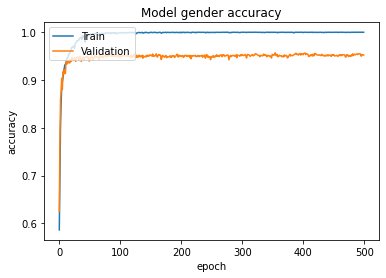

In [10]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[0. 1.]]
gender: male


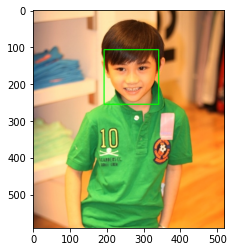

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2

face_detect = cv2.CascadeClassifier('/content/drive/MyDrive/PROJECT_AI/Detect_face/haarcascade_frontalface_default.xml')

#load ảnh
imgin = cv2.imread('/content/boy10t.jpg')
imgin = cv2.cvtColor(imgin, cv2.COLOR_BGR2RGB)
faces = face_detect.detectMultiScale(imgin)
for (x,y,w,h) in faces:
    img = imgin[y:y+h,x:x+w]
    cv2.rectangle(imgin, (x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imgin)
img = cv2.resize(img, (100,100))
tensor = np.expand_dims(img, axis=0)

#dự đoán
a = np.argmax(model.predict(tensor), axis=-1)
print(model.predict(tensor))
print('gender:',class_name[int(a)])

[[1. 0.]]
gender: female


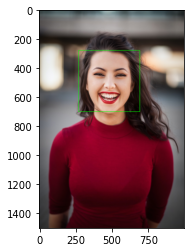

In [19]:
#load ảnh
imgin = cv2.imread('/content/girl_smile.jfif')
imgin = cv2.cvtColor(imgin, cv2.COLOR_BGR2RGB)
faces = face_detect.detectMultiScale(imgin)
for (x,y,w,h) in faces:
    img = imgin[y:y+h,x:x+w]
    cv2.rectangle(imgin, (x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imgin)
img = cv2.resize(img, (100,100))
tensor = np.expand_dims(img, axis=0)

#dự đoán
a = np.argmax(model.predict(tensor), axis=-1)
print(model.predict(tensor))
print('gender:',class_name[int(a)])

[[1. 0.]]
gender: female


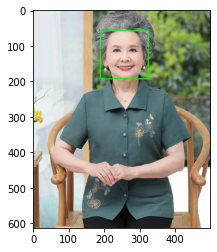

In [22]:
#load ảnh
imgin = cv2.imread('/content/bagia.jpg')
imgin = cv2.cvtColor(imgin, cv2.COLOR_BGR2RGB)
faces = face_detect.detectMultiScale(imgin)
for (x,y,w,h) in faces:
    img = imgin[y:y+h,x:x+w]
    cv2.rectangle(imgin, (x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imgin)
img = cv2.resize(img, (100,100))
tensor = np.expand_dims(img, axis=0)

#dự đoán
a = np.argmax(model.predict(tensor), axis=-1)
print(model.predict(tensor))
print('gender:',class_name[int(a)])

[[0. 1.]]
gender: male


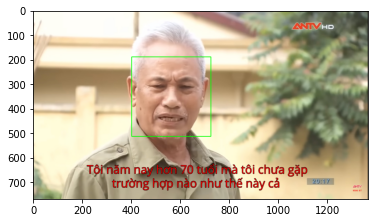

In [23]:
#load ảnh
imgin = cv2.imread('/content/onggia70t.jpg')
imgin = cv2.cvtColor(imgin, cv2.COLOR_BGR2RGB)
faces = face_detect.detectMultiScale(imgin)
for (x,y,w,h) in faces:
    img = imgin[y:y+h,x:x+w]
    cv2.rectangle(imgin, (x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imgin)
img = cv2.resize(img, (100,100))
tensor = np.expand_dims(img, axis=0)

#dự đoán
a = np.argmax(model.predict(tensor), axis=-1)
print(model.predict(tensor))
print('gender:',class_name[int(a)])

[[0. 1.]]
gender: male


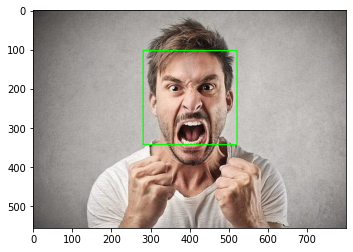

In [24]:
#load ảnh
imgin = cv2.imread('/content/angry_face.jpg')
imgin = cv2.cvtColor(imgin, cv2.COLOR_BGR2RGB)
faces = face_detect.detectMultiScale(imgin)
for (x,y,w,h) in faces:
    img = imgin[y:y+h,x:x+w]
    cv2.rectangle(imgin, (x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imgin)
img = cv2.resize(img, (100,100))
tensor = np.expand_dims(img, axis=0)

#dự đoán
a = np.argmax(model.predict(tensor), axis=-1)
print(model.predict(tensor))
print('gender:',class_name[int(a)])